<a href="https://colab.research.google.com/github/tiskutis/Brolis/blob/main/Classical_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

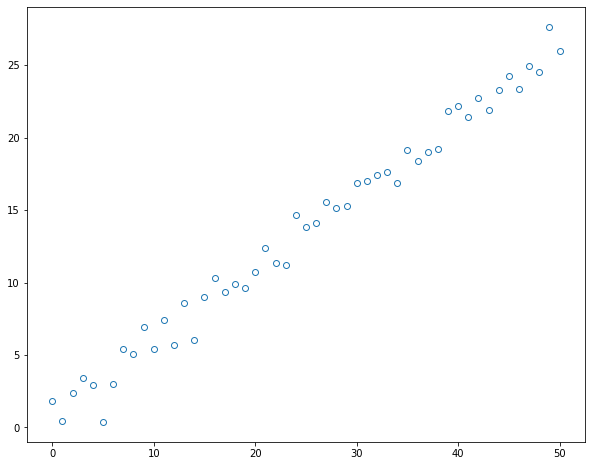

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#
np.random.seed(234)
# Set the coefficients:
N = 50
beta_0 = 1
beta_1 = 0.5
# Generate sample data:
x = np.arange(start = 0, stop = N + 1, step = 1)
#x = list(range(0, N + 1)) # not np.ndarray 
e = np.random.normal(loc = 0, scale = 1, size = len(x))
y = beta_0 + beta_1 * x + e
# Plot the data
_ = plt.figure(num = 0, figsize = (10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'none')
plt.show()